<a href="https://www.kaggle.com/code/sivarajsingh/customer-segmentation-kmeans?scriptVersionId=153056684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Descriptive Statistical Summary on Dataset

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv') 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


### Data Visualization

Text(0.5, 1.0, 'Female Annual Income vs Score')

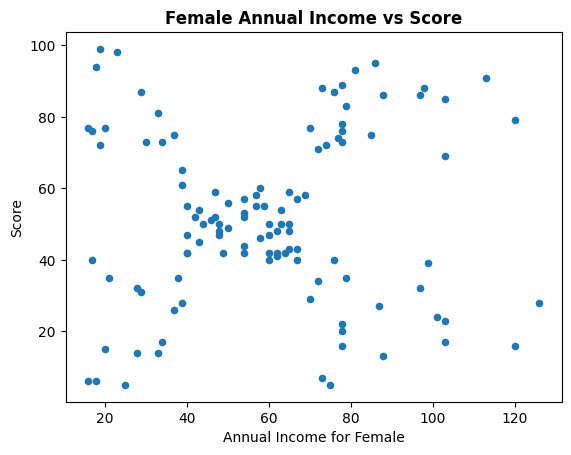

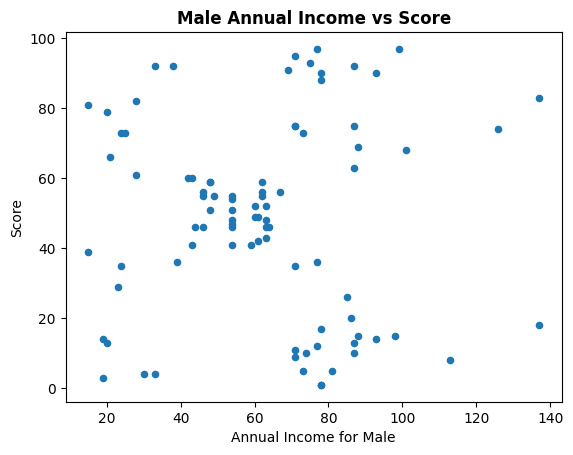

In [8]:
female,male = df.groupby(['Gender']).plot(x='Annual Income (k$)',y='Spending Score (1-100)',kind='scatter')
male.set_xlabel('Annual Income for Male')
male.set_ylabel('Score')
female.set_xlabel('Annual Income for Female')
female.set_ylabel('Score')
male.set_title('Male Annual Income vs Score',weight='bold')
female.set_title('Female Annual Income vs Score',weight='bold')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

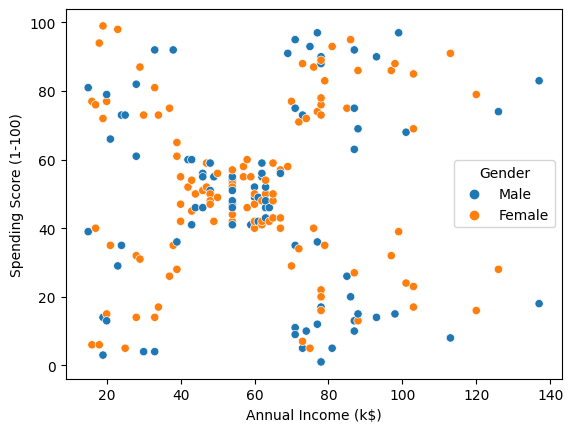

In [9]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender')

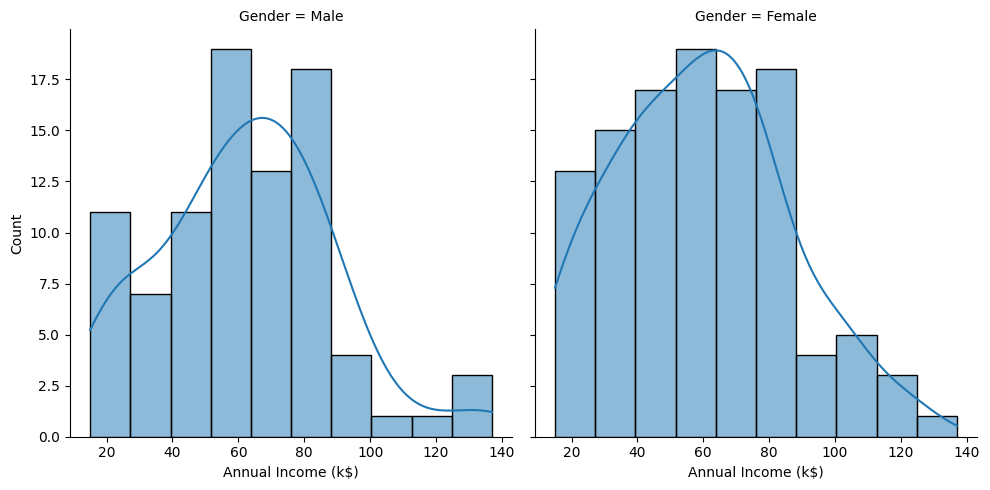

In [10]:
sns.displot(data=df,x='Annual Income (k$)',col='Gender',kde=True)

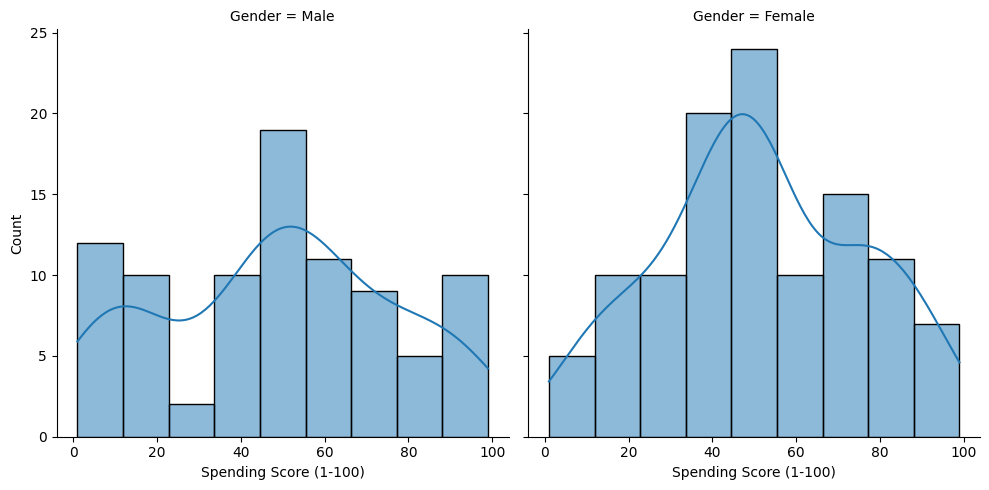

In [11]:
sns.displot(data=df,x='Spending Score (1-100)',col='Gender',kde=True)

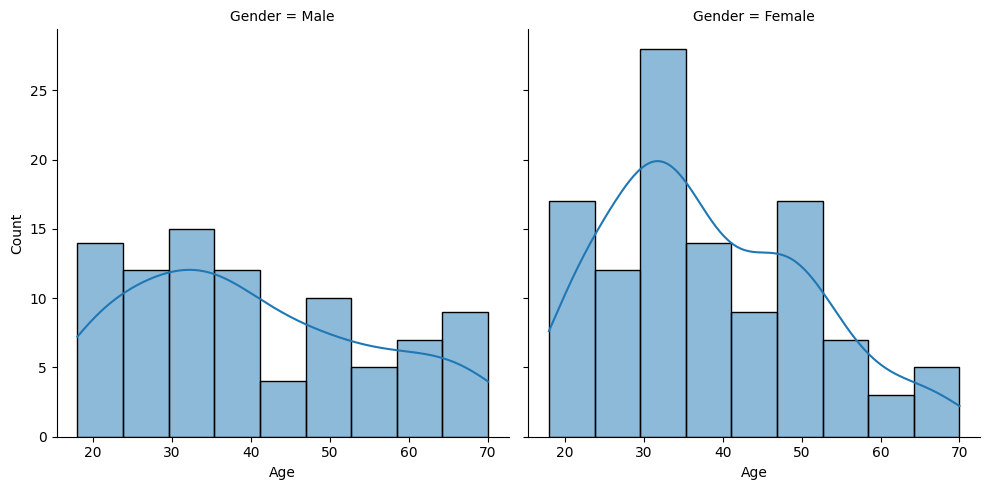

In [12]:
sns.displot(data=df,x='Age',col='Gender',kde=True)

<Axes: xlabel='Gender', ylabel='count'>

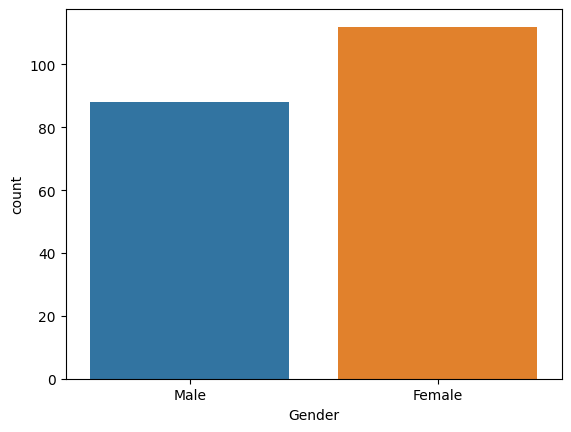

In [13]:
sns.countplot(x='Gender',data=df)

Grouping and finding the average salary 
Grouping and finding the average score , and create feature engineering good score, low score etc

In [14]:
df.groupby('Gender')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


<Axes: ylabel='Frequency'>

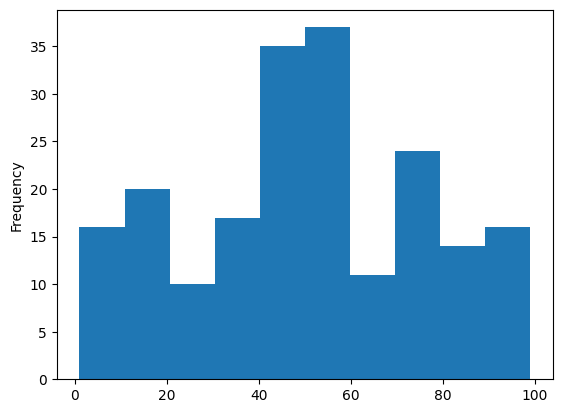

In [15]:
df['Spending Score (1-100)'].plot(kind='hist')

#### Splitting the Train Data and Test Data

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
X = df.drop('CustomerID',axis=1)
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Preprocessing

In [18]:
X = pd.get_dummies(X,dtype='float')

In [19]:
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


In [20]:
X.rename(columns={'Gender_Female':'Gender'},inplace=True)

In [21]:
X.drop('Gender_Male',axis=1,inplace=True)

In [22]:
X

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,0.0
1,21,15,81,0.0
2,20,16,6,1.0
3,23,16,77,1.0
4,31,17,40,1.0
...,...,...,...,...
195,35,120,79,1.0
196,45,126,28,1.0
197,32,126,74,0.0
198,32,137,18,0.0


## UnSupervised Learning - KMeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters=5 , random_state= 42)
model.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [25]:
labels = model.labels_
centroids = model.cluster_centers_
print(labels[:5])

[0 4 0 4 0]


In [26]:
centroids

array([[45.2173913 , 26.30434783, 20.91304348,  0.60869565],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154],
       [40.32432432, 87.43243243, 18.18918919,  0.48648649],
       [43.12658228, 54.82278481, 49.83544304,  0.58227848],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909]])

In [27]:
labels

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

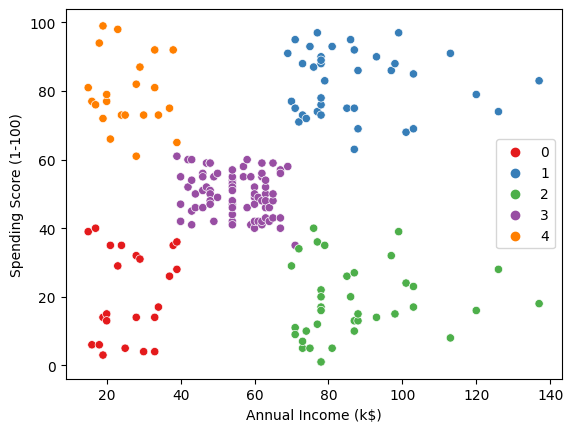

In [28]:
## "Annual Income" vs "Spending Score" model labels
sns.scatterplot(x=df['Annual Income (k$)'] , y= df['Spending Score (1-100)'],hue=labels,palette='Set1')
labels
#sns.scatterplot(x= centroids[:,0],y= centroids[: ,1],color= 'gray',marker= '*',s= 500)
